# K_Modes Clustering

toy example 참고
https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

In [3]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

In [4]:
# Dataset_생성_Student

fav_subject = np.array(['math', 'math', 'english', 'science', 'english', 'science', 
                        'math', 'english', 'science', 'math', 'science', 'english'])
club_list = np.array(['music', 'art', 'art', 'book', 'music', 'music', 
                      'art', 'book', 'book', 'music', 'art', 'book'])
gender_list = np.array(['boy', 'girl', 'girl', 'boy', 'girl', 'girl',
                       'boy', 'boy', 'boy', 'girl', 'girl', 'boy'])
grade_list = np.array(['1', '3', '2', '2', '3', '2',
                      '2', '1', '1', '3', '2', '3'])
student = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6',
          'S7', 'S8', 'S9', 'S10', 'S11', 'S12']

data = pd.DataFrame({'student':student, 
                     'fav_subject':fav_subject, 
                     'club_list':club_list, 
                     'gender_list':gender_list,
                     'grade_list':grade_list})
data = data.set_index('student')
data

,fav_subject,club_list,gender_list,grade_list
student,,,,
S1,math,music,boy,1
S2,math,art,girl,3
S3,english,art,girl,2
S4,science,book,boy,2
S5,english,music,girl,3
S6,science,music,girl,2
S7,math,art,boy,2
S8,english,book,boy,1
S9,science,book,boy,1


## Step 1.  Find Best K by plotting Elbow curve

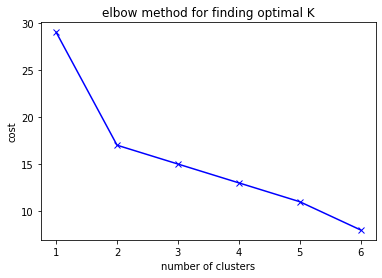

In [16]:
cost = []
K = range(1, 7)
for num in K:
    kmode = KModes(n_clusters = num, n_init = 3)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()

In [18]:
kmode = KModes(n_clusters = 2, n_init = 3)
clusters = kmode.fit_predict(data)
data['clusters'] = clusters

In [19]:
data

,fav_subject,club_list,gender_list,grade_list,clusters
student,,,,,
S1,math,music,boy,1,1
S2,math,art,girl,3,0
S3,english,art,girl,2,0
S4,science,book,boy,2,1
S5,english,music,girl,3,0
S6,science,music,girl,2,0
S7,math,art,boy,2,0
S8,english,book,boy,1,1
S9,science,book,boy,1,1


## Result?

In [20]:
data.loc[data.clusters == 0]

,fav_subject,club_list,gender_list,grade_list,clusters
student,,,,,
S2,math,art,girl,3,0
S3,english,art,girl,2,0
S5,english,music,girl,3,0
S6,science,music,girl,2,0
S7,math,art,boy,2,0
S10,math,music,girl,3,0
S11,science,art,girl,2,0


In [21]:
data.loc[data.clusters == 1]

,fav_subject,club_list,gender_list,grade_list,clusters
student,,,,,
S1,math,music,boy,1,1
S4,science,book,boy,2,1
S8,english,book,boy,1,1
S9,science,book,boy,1,1
S12,english,book,boy,3,1


club_list가 한 쪽이 굉장히 몰려 있음을 알 수 있다. club_list에 따라서 분리가 되어있음을 볼 수 있다.
cost 가 조금 더 줄어들은 3으로 한번 확인해보자.

## K = 3 case

In [22]:
kmode = KModes(n_clusters = 3, n_init = 3)
clusters = kmode.fit_predict(data)
data['clusters_2'] = clusters

In [24]:
data.loc[data.clusters_2 == 0]

,fav_subject,club_list,gender_list,grade_list,clusters,clusters_2
student,,,,,,
S3,english,art,girl,2,0,0
S6,science,music,girl,2,0,0
S7,math,art,boy,2,0,0
S11,science,art,girl,2,0,0


In [25]:
data.loc[data.clusters_2 == 1]

,fav_subject,club_list,gender_list,grade_list,clusters,clusters_2
student,,,,,,
S1,math,music,boy,1,1,1
S4,science,book,boy,2,1,1
S8,english,book,boy,1,1,1
S9,science,book,boy,1,1,1
S12,english,book,boy,3,1,1


In [26]:
data.loc[data.clusters_2 == 2]

,fav_subject,club_list,gender_list,grade_list,clusters,clusters_2
student,,,,,,
S2,math,art,girl,3,0,2
S5,english,music,girl,3,0,2
S10,math,music,girl,3,0,2


여기서는 어느정도 조금 더 섞이긴 했지만, 조금 더 club별로 묶였음을 볼 수 있다.